In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def print_img(img, label=""):
    # 顯示圖片用
    plt.imshow(img, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(label)
    plt.xlabel("type:{}, shape:{}".format(img.dtype, img.shape))
    plt.show()

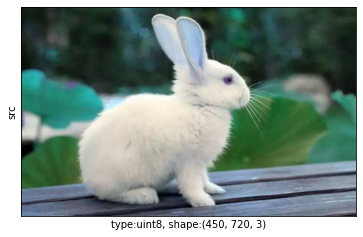

In [3]:
img_src = cv.imread('../image/rbt.jpg')
print_img(img_src, 'src')

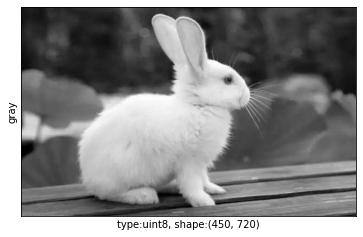

In [4]:
img_gray = cv.cvtColor(img_src, cv.COLOR_RGB2GRAY)
print_img(img_gray, 'gray')

# 形態學梯度
* 膨脹減去腐蝕
* 可以將邊緣區域突出

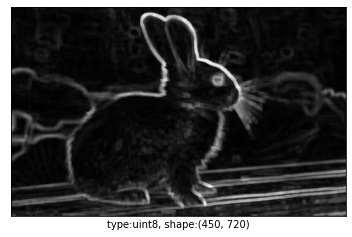

In [7]:
ksize = 3
kernel = np.ones((ksize, ksize), dtype=np.uint8)
img_dilate = cv.dilate(img_gray, kernel, iterations=3)
img_erode = cv.erode(img_gray, kernel, iterations=3)
img_border = img_dilate - img_erode
print_img(img_border)

# 形態學禮帽
* 灰階圖像減去開運算後圖像
* 局部亮被提出

In [8]:
def mop_open(img, ksize=3, iterations=1):
    kernel = np.ones((ksize, ksize), dtype=np.uint8)
    
    # (腐蝕->腐蝕...) => (膨脹->膨脹...)
    img_erode = cv.erode(img, kernel, iterations=iterations)
    img_dilate = cv.dilate(img_erode, kernel, iterations=iterations)
    return img_dilate

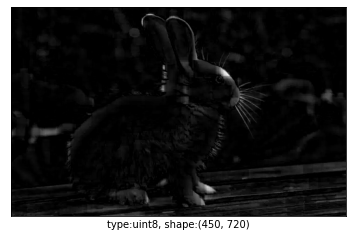

In [16]:
img_open = mop_open(img_gray, 5, 5)
img_tophat = img_gray - img_open
print_img(img_tophat)

# 形態學黑帽
* 閉運算圖像減去灰階圖像
* 黑色坑洞被提出

In [19]:
def mop_close(img, ksize=3, iterations=1):
    kernel = np.ones((ksize, ksize), dtype=np.uint8)
    
    # (膨脹->膨脹...) => (腐蝕->腐蝕...)
    img_dilate = cv.dilate(img, kernel, iterations=iterations)
    img_erode = cv.erode(img_dilate, kernel, iterations=iterations)
    return img_erode

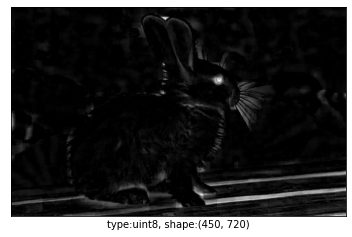

In [36]:
img_close = mop_close(img_gray, 3, 10)
img_blackhat = img_close - img_gray
print_img(img_blackhat)